In [1]:
import sys
import MeCab
m = MeCab.Tagger ("mecab-ipadic-neologd")

In [2]:
def parse_mecab(block):
    res = []
    
    for line in block.split('\n'):
        if line == '':
            return res
        (surface, node) = line.split('\t')
        pos,pos1,_,_,_,_,base,*_ = node.split(",")
        lineDict = {
            'surface': surface,
            'base': base,
            'pos': pos,
            'pos1': pos1
        }
        if surface == "\u3000":
            continue
        res.append(lineDict)

In [3]:
with open("neko.txt.mecab",mode="rt",encoding="utf-8") as f:
    txt = f.read().split("EOS\n")

In [4]:
txt = list(filter(lambda x: x!= "",txt))
doc = [parse_mecab(block) for block in txt if len(block) != 0]

In [5]:
doc = [i for i in doc if i != []]

In [6]:
word_list = []
for i in doc:
    for j in i:
        word_list.append(j["surface"]) #+ "_" + j["pos"] + "_" + j["pos1"])

In [7]:
from collections import defaultdict,Counter
import matplotlib.pyplot as plt
import japanize_matplotlib

/home/kitano/anaconda3/envs/test/lib/python3.7/site-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [47]:
c = Counter(word_list)
lst = list(c.values())
lst.sort(reverse=True)

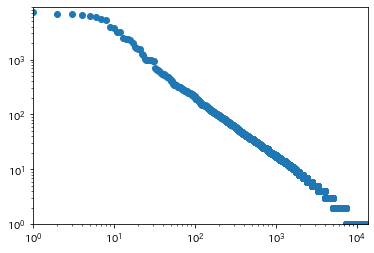

In [50]:
plt.scatter(range(len(lst)),lst)
plt.xscale('log')
plt.yscale('log')

plt.xlim(1, len(lst)+1)
plt.ylim(1, lst[0])
plt.show()